# COGS 118A - Final Project

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Names

- Cristian Antonio-Hernandez
- Rahul Puranam
- Ricardo Sedano
- Jason Shao

# Abstract 
Recieving email spam has become an issue in  users' digital wellbeing; email spam has the potential to overflow inboxes, invite malware to devices, and scam users for personal information. Our goal is to develop an effective email spam detection system. We will be using a dataset consisting of labeled emails, where each email is classified as either spam or non-spam. The data represents various features extracted from the emails, such as the presence of certain keywords, email header information, and textual content. We will employ machine learning algorithms to train a model on this labeled data to accurately classify incoming emails as spam or non-spam. The performance of the system will be measured by evaluating its ability to correctly classify a new set of emails, using metrics such as accuracy, precision, recall, and F1-score. Our objective is to achieve high accuracy and minimize false positives (legitimate emails classified as spam) and false negatives (spam emails classified as legitimate), ensuring an efficient and reliable spam detection system.

# Background

The field of email spam detection has been extensively researched, with significant prior work paving the way for advancements in this area. Various techniques and approaches have been explored to tackle the problem of email classification, aiming to accurately distinguish between spam and non-spam emails.

Researchers have employed machine learning algorithms, such as support vector machines (SVMs), naive Bayes classifiers, and ensemble methods, to build effective spam detection models<a name="solanki"></a>[<sup>[1]</sup>](#solanki)<a name="dada"></a>[<sup>[2]</sup>](#dada). These models utilize features extracted from email content, such as keyword presence, textual analysis, and email header information, to make predictions on the classification of incoming emails.

Feature engineering has been a crucial aspect of this research, as it involves selecting and extracting relevant features that contribute to the identification of spam emails<a name="dada"></a>[<sup>[2]</sup>](#dada). Additionally, researchers have explored the use of natural language processing techniques to analyze the text of emails, including techniques like text tokenization, stemming, and TF-IDF weighting<a name="sahami"></a>[<sup>[3]</sup>](#sahami)<a name="yang"></a>[<sup>[4]</sup>](#yang).

# Problem Statement

Our goal is to develop an effective email spam classification system by leveraging features such as keyword presence, textual analysis, and email header information. This research aims to address the following questions:

- How can we accurately predict whether an email is spam or not spam based on its content, utilizing features such as keyword presence, textual analysis, and email header information?

- Which machine learning algorithms, such as Support Vector Machines, Decision Trees, Naive Bayes classifiers, or ensemble methods like Random Forest, are most suitable for solving this email spam classification problem?

We will collect a dataset consisting of a representative sample of emails, including both spam and non-spam examples. The dataset will be preprocessed to extract relevant features and labeled accordingly. We will then train and evaluate different machine learning models using appropriate performance metrics, such as accuracy.

By conducting this research, we aim to develop a robust and reliable email spam classification system that can effectively differentiate between spam and non-spam emails, while minimizing false positives and false negatives.

# Data

The dataset selected for the project is the UCI Machine Learning Repository's 'Spambase Data Set'<a name="uci"></a>[<sup>[5]</sup>](#uci), which is comprised of 4601 observations and 57 continuous variables along with 1 nominal variable. In our data, an observation consists of percentage of word frequncy for 48 words, percentage of character frequncy for 6 special charcters, average length of uninterrupted sequences of capital letters, length of longest uninterrupted sequence of capital letters, total number of capital letters in the e-mail, and a nominal denoter of whether an email is spam or not. For the last variable, it must be noted that 0 represents a email that is not spam, and 1 represents a spam email. 

Because our project deals with a categorical classificiation problem, the critical variables could be represented in a regression model. Pertaining to the scenario, critical values would hypothetically be tied to special character, word, and capital letter usage.

Additional to obtaining the data, our team did not handle data more than needed in order to preserve integrity in the data, and reduce bias thoughout; the dataset had very little cleaning, and needed adjusting. The dataset and names file came separate, so in order to prepare our dataset, we used the df.columns() function to name the columns according to their respective variable.

In order to illustrate an effective classification model and to help midigate overfitting, L2 regularization, pruning, and cross-validation can be valuable processes needed to sighly transform data, and balance the bias-variance tradeoff.



In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header = None)
df.columns = ['make','address','all','3d','our','over','remove','internet','order','mail','recieve','will','people','report','addresses','free','business','email','you','credit','your','font','000','money','hp','hpl','george','650','lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct','cs','meeting','original','project','re','edu','table','conference',';','(','[','!','$','#','Capital Run Length Average','Capital Run Length Longest','Capital Run Length Total','Spam']
df

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,Capital Run Length Average,Capital Run Length Longest,Capital Run Length Total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Proposed Solution

To address the email spam classification problem, we decided to utilize Support Vector Machines (SVM). SVMs are effective in separating data points into different classes by finding an optimal hyperplane that maximizes the margin between the classes. In our case, we aim to create a decision boundary that accurately distinguishes between spam and non-spam emails. By constructing a margin around this decision boundary, we can achieve better generalization and potentially reduce both false positives and false negatives. We will be implementing gradient descent to find the minimum loss and possibly using kernels to transform our data into data that is linearly separable in higher dimensions. Kernels with SVMs can help us find a linearly separable representation of the data, even if the original features were not linearly separable. By applying appropriate kernels, we can potentially improve the separation between spam and non-spam emails, enhancing the accuracy of our classification model.
To evaluate the performance of our solution, we will split our dataset into training and testing sets. During training, we will fit the SVM model on the labeled training data and optimize the hyperparameters using techniques like cross-validation. Then, we will use the testing dataset to measure the accuracy of our classifier. Accuracy provides an overall indication of how well the model performs in terms of correct predictions. We will utilize the F1 score, which considers both precision and recall, to assess the model's performance specifically in terms of false positives and false negatives.

# Evaluation Metrics

One evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model is the F1-score (F1-score = $\frac{2 * (\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}$), assessing both precision and recall, as precision represents the ability of the model to correctly identify spam emails among the emails it classifies as spam, and recall measures the ability of the model to identify all the actual spam emails.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



In [3]:
X = df.drop(columns=['Spam'])
y = df['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modeling spam detection through SVM (Linear, Poly, RBF)

CPU times: user 4min 9s, sys: 184 ms, total: 4min 9s
Wall time: 4min 9s
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       824
           1       0.91      0.90      0.90       557

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



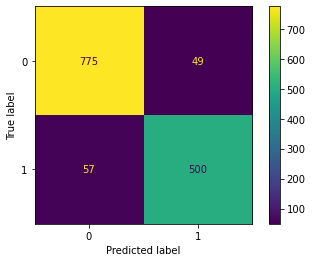

In [4]:
# Train a SVM with linear kernel
C = 1.0  # SVM regularization parameter
svm = SVC(kernel='linear', C=C)
%time svm.fit(X_train, y_train)


yhat = svm.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       824
           1       0.90      0.15      0.25       557

    accuracy                           0.65      1381
   macro avg       0.77      0.57      0.51      1381
weighted avg       0.74      0.65      0.56      1381



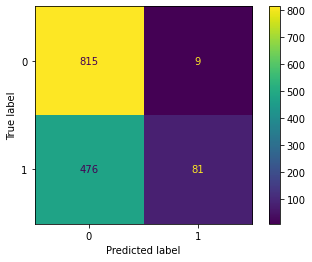

In [5]:
# Train a SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=C)
svm_poly.fit(X_train, y_train)


yhat = svm_poly.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       824
           1       0.99      0.28      0.44       557

    accuracy                           0.71      1381
   macro avg       0.83      0.64      0.62      1381
weighted avg       0.80      0.71      0.66      1381



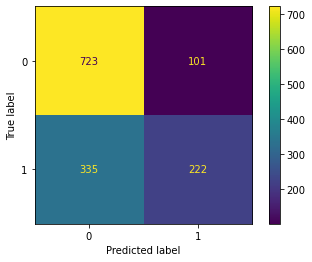

In [6]:
# Train a SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=C)
svm_rbf.fit(X_train, y_train)


yhat = svm_rbf.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

### Modeling spam detection through Decision Tree and Random Forest

CPU times: user 71.6 ms, sys: 3.99 ms, total: 75.6 ms
Wall time: 72.6 ms
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       824
           1       0.89      0.88      0.88       557

    accuracy                           0.91      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381



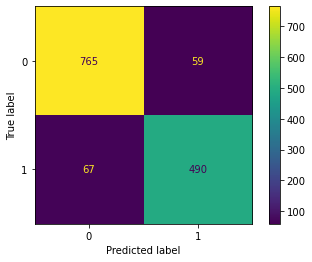

In [7]:
dt = DecisionTreeClassifier()
%time dt.fit(X_train,y_train)
# Accuracy of the model
dt.score(X_test,y_test)
# Checking to see if model is overfitting
dt.score(X_train, y_train)


yhat = dt.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

CPU times: user 95.1 ms, sys: 3 ms, total: 98.1 ms
Wall time: 95.2 ms
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       824
           1       0.95      0.91      0.93       557

    accuracy                           0.94      1381
   macro avg       0.94      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381



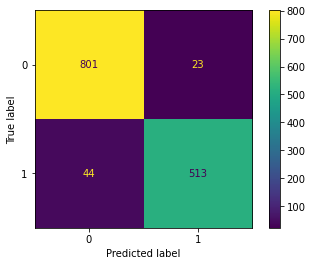

In [8]:
# Random Forest - Ensemble Decision Trees
rf = RandomForestClassifier(n_estimators = 15)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)
rf.score(X_train, y_train)


yhat = rf.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

CPU times: user 612 ms, sys: 9 µs, total: 612 ms
Wall time: 610 ms
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       824
           1       0.94      0.89      0.92       557

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



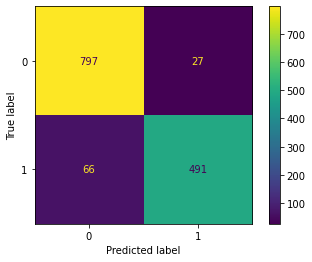

In [9]:
# Bagging 
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 1.0, n_estimators = 20)
%time bg.fit(X_train, y_train)
bg.score(X_test, y_test)
bg.score(X_train, y_train)


yhat = bg.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

CPU times: user 432 ms, sys: 990 µs, total: 433 ms
Wall time: 431 ms
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       824
           1       0.90      0.87      0.89       557

    accuracy                           0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.91      0.91      1381



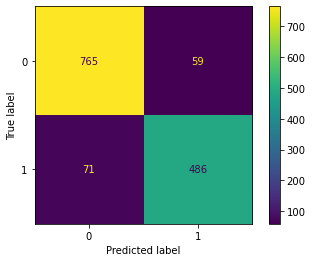

In [10]:
# Boosting - Ada Boost
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 5, learning_rate = 1)
%time adb.fit(X_train, y_train)
adb.score(X_test, y_test)
adb.score(X_train, y_train)


yhat = adb.predict(X_test)
print(classification_report(y_test, yhat))
ConfusionMatrixDisplay.from_predictions(y_test, yhat);

In [14]:
y_pred = adb.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9058653149891384


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The most obvious ethical concern that should be addressed is having access to emails, of which for the average email recipient, may include personal information, like residential address, close contacts, and calendar events. Going back a step, people may not even want their email address to get leaked, so having this data be used may raise concern. Continuing on the email message contents, a detection service would have to scan a large portion of the email, or each line of text to properly make a decision. Having an algorithm read every email automatically aould also cause concern.

To address these issues, a step toward the correct solution would be to automatically not store and get rid of all text that the model takes in. From a user standpoint, it may also be helpful to give permission to the model to only filter email spam from senders outside of the recipients most popular contacts, or turn off or deactivative the spam detection completely if the user feels unsure if the detection service is too invasive or unethical.

### Conclusion

Email spam continues to pose a threat to email service users throughout many instances. By using an email dataset, we aim is to develop an effective email spam detection system, and nby identifying the most accruate model, the random forest - ensemble decision tree model. With this model, we produce an accuracy score above 95 percent, meaning 95 percent of spam is expected to be detected, and given the problem, the spam would get deleted. The next steps would be to implement the spam detection into a preliminary version of a spam-free email service. However, a more practical choice would be to impove the understanding of what variables or factors not accounted for in this project may influence a more accurate spam detection service. This understanding can be impoved in recording more email data, and hypothesize upon new factors influencing spam deteection. 

# Footnotes
<a name="solanki"></a>1.[^](#solanki): Solanki, Rohit Kumar, et al. Spam Filtering Using Hybrid Local-Global Naive Bayes Classifier, 28 Sept. 2015, www.semanticscholar.org/paper/Spam-filtering-using-hybrid-local-global-Naive-Solanki-Verma/978a7972210e2d771dac6f92e17594100ea1a8a6. <br> 
<a name="dada"></a>2.[^](#dada): Dada, Emmanuel Gbenga, et al. “Machine Learning for Email Spam Filtering: Review, Approaches and Open Research Problems.” Heliyon, vol. 5, no. 6, June 2019, p. e01802, https://doi.org/10.1016/j.heliyon.2019.e01802. <br>
<a name="sahami"></a>3.[^](#sahami): Sahami, Mehran, et al. A B a Yesian Approach to Filtering Junk E-Mail. http://erichorvitz.com/ftp/junkfilter.pdf. <br>
<a name="yang"></a>4.[^](#yang): Yang, Yiming, and Xin Liu. “A Re-Examination of Text Categorization Methods.” Proceedings of the 22nd Annual International ACM SIGIR Conference on Research and Development in Information Retrieval - SIGIR ’99, 1999, https://doi.org/10.1145/312624.312647. <br>
<a name="uci"></a>5.[^](#uci): “Spambase Data Set” UCI Machine Learning Repository Archives, https://archive.ics.uci.edu/ml/datasets/spambase. <br>
